In [339]:
%matplotlib inline
from pycalphad import binplot, Database, variables as v
from espei.datasets import recursive_glob, load_datasets
from espei import plot as espeiplot

# load your data here
dbf = Database('out.tdb.mcmc')
datasets = load_datasets(recursive_glob('Cu-Mg/input-data', '*.json'))


comps = ['CU', 'MG', 'VA']
phases = sorted(list(dbf.phases.keys()))

In [391]:
import numpy as np

# load the chain
chain = np.loadtxt('Cu-Mg/2017-08-13-231628-chain-trace.txt')
#chain = np.loadtxt('2017-08-12-111150-chain.txt')
# remove the zeros
chain = chain[np.nonzero(np.all(chain != 0, axis=1))]

# setup for the specific chain and place in the chain
ndim = 2  # number of parallel parameter chains to run. Default in paramselect is 2.
nparam = chain.shape[1]
nwalker = nparam*ndim
niterations = int(chain.shape[0]/nwalker)

# reshape to (iterations, n_chains (==n_parameters in ensemble), n_parameters)
chain_shape = chain.shape
chain = chain.reshape(nwalker, niterations, nparam)
# swap the iterations and n_chains axes so that the dimensions are now (n_chains, iterations, parameters)
chain = np.swapaxes(chain, 0, 1)
# finally, concatenate the n_chains dimension so chains is now chronological (iterations, parameters)
# now higher indicies mean later iterations, where previously higher indices meant higher iterations *within each chain* then restarting at each chain
chain = np.concatenate(chain)
print(chain.shape)

(11000, 11)


In [368]:
og_chain = np.loadtxt('Cu-Mg/2017-08-13-231628-chain-trace.txt')
nz = np.nonzero(np.all(og_chain != 0, axis=1))
lnprob = np.loadtxt('Cu-Mg/2017-08-13-231628-prob.trace.txt')
opt_params = og_chain[nz][np.nanargmin(-lnprob[nz])]
print(lnprob.shape)

(44000,)


In [367]:
opt_params

array([ -46345.75365007,  -44941.2207715 ,   85820.75608759,
       -119518.90514569,  194605.96780564,  -58099.37644529,
        158231.0508793 ,    5380.40334386,    8472.24062581,
        -11859.45071201,  -62944.76453184])

In [369]:
params_list = sorted([s for s in dbf.symbols.keys() if 'VV' in s])
symbol_replacement_dict = {s: v for s, v in zip(params_list, opt_params)}

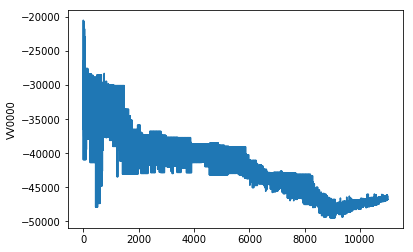

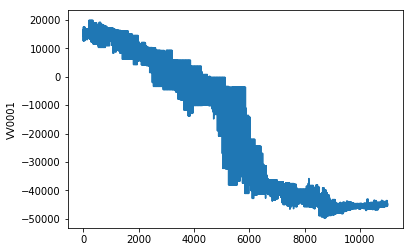

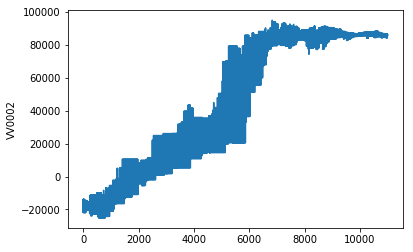

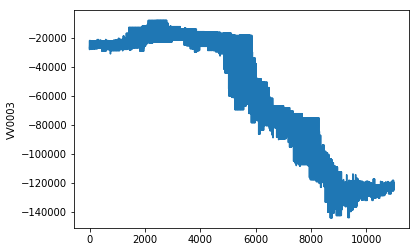

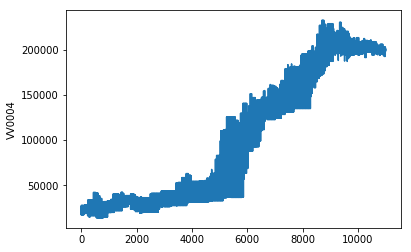

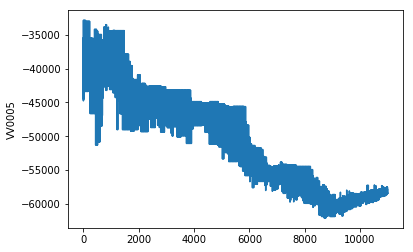

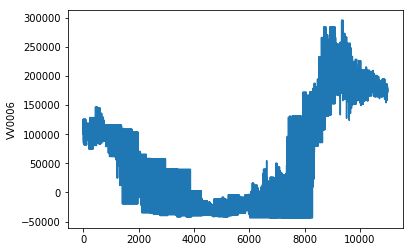

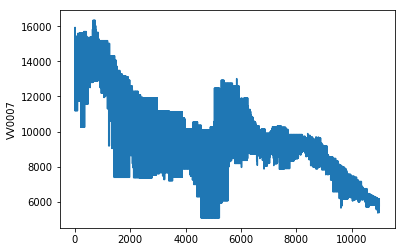

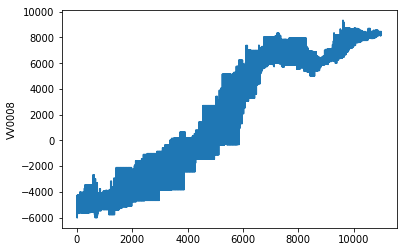

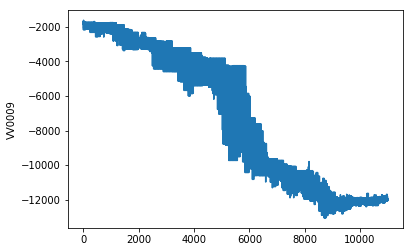

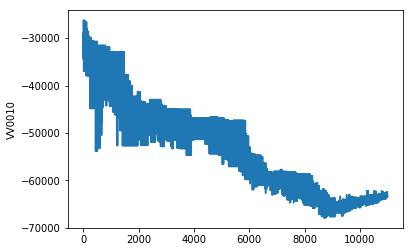

In [393]:
for i, param_name in enumerate(params_list):
    fig = plt.figure()
    ax = fig.gca()
    ax.set_ylabel(param_name)
    ax.plot(chain[:, i])

/Users/brandon/.virtualenvs/espei/lib/python3.5/site-packages/dask/async.py:13: UserWarning: `dask.async.get_sync` has been moved to `dask.local.get_sync`, please update your imports
  warnings.warn(_msg.format('get_sync'))
/Users/brandon/Projects/pycalphad-dev/pycalphad/core/utils.py:146: RuntimeWarning: divide by zero encountered in log
  pts = -np.log(pts)
/Users/brandon/Projects/pycalphad-dev/pycalphad/core/utils.py:150: RuntimeWarning: invalid value encountered in true_divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]


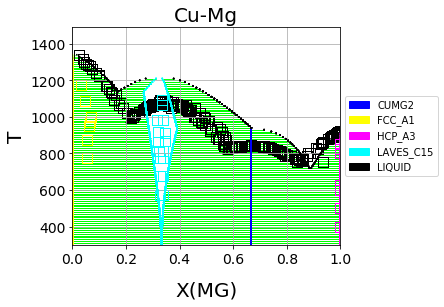

In [234]:
# 0 iterations
from pycalphad.plot.eqplot import eqplot
from pycalphad import equilibrium
conds = {v.P: 101325, v.T: (300, 1500, 10), v.X('MG'): (0, 1, 0.01)}
eq_updated = equilibrium(dbf, comps, phases, conds)
eqplot(eq_updated)
espeiplot.multi_plot(dbf, comps, phases, datasets)

/Users/brandon/.virtualenvs/espei/lib/python3.5/site-packages/dask/async.py:13: UserWarning: `dask.async.get_sync` has been moved to `dask.local.get_sync`, please update your imports
  warnings.warn(_msg.format('get_sync'))
/Users/brandon/Projects/pycalphad-dev/pycalphad/core/utils.py:146: RuntimeWarning: divide by zero encountered in log
  pts = -np.log(pts)
/Users/brandon/Projects/pycalphad-dev/pycalphad/core/utils.py:150: RuntimeWarning: invalid value encountered in true_divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]


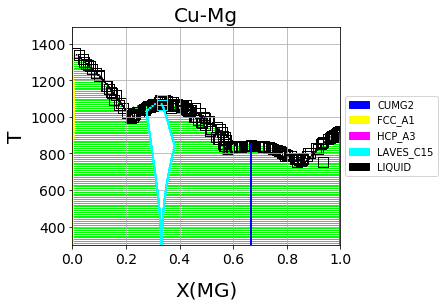

In [60]:
# 300 iterations without fcc and laves data.
from pycalphad.plot.eqplot import eqplot
from pycalphad import equilibrium
conds = {v.P: 101325, v.T: (300, 1500, 10), v.X('MG'): (0, 1, 0.01)}
eq_updated = equilibrium(dbf, comps, phases, conds, parameters=symbol_replacement_dict)
eqplot(eq_updated)
espeiplot.multi_plot(dbf, comps, phases, datasets)

/Users/brandon/.virtualenvs/espei/lib/python3.5/site-packages/dask/async.py:13: UserWarning: `dask.async.get_sync` has been moved to `dask.local.get_sync`, please update your imports
  warnings.warn(_msg.format('get_sync'))
/Users/brandon/Projects/pycalphad-dev/pycalphad/core/utils.py:146: RuntimeWarning: divide by zero encountered in log
  pts = -np.log(pts)
/Users/brandon/Projects/pycalphad-dev/pycalphad/core/utils.py:150: RuntimeWarning: invalid value encountered in true_divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]


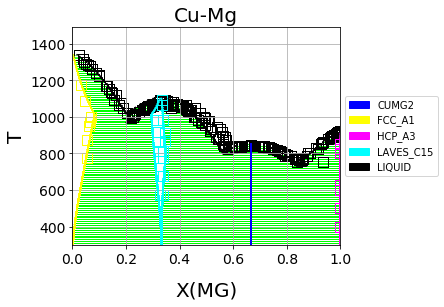

In [370]:
# 500 iterations with laves, fcc, hcp data
from pycalphad.plot.eqplot import eqplot
from pycalphad import equilibrium
conds = {v.P: 101325, v.T: (300, 1500, 10), v.X('MG'): (0, 1, 0.01)}
eq_updated = equilibrium(dbf, comps, phases, conds, parameters=symbol_replacement_dict)
eqplot(eq_updated)
espeiplot.multi_plot(dbf, comps, phases, datasets)

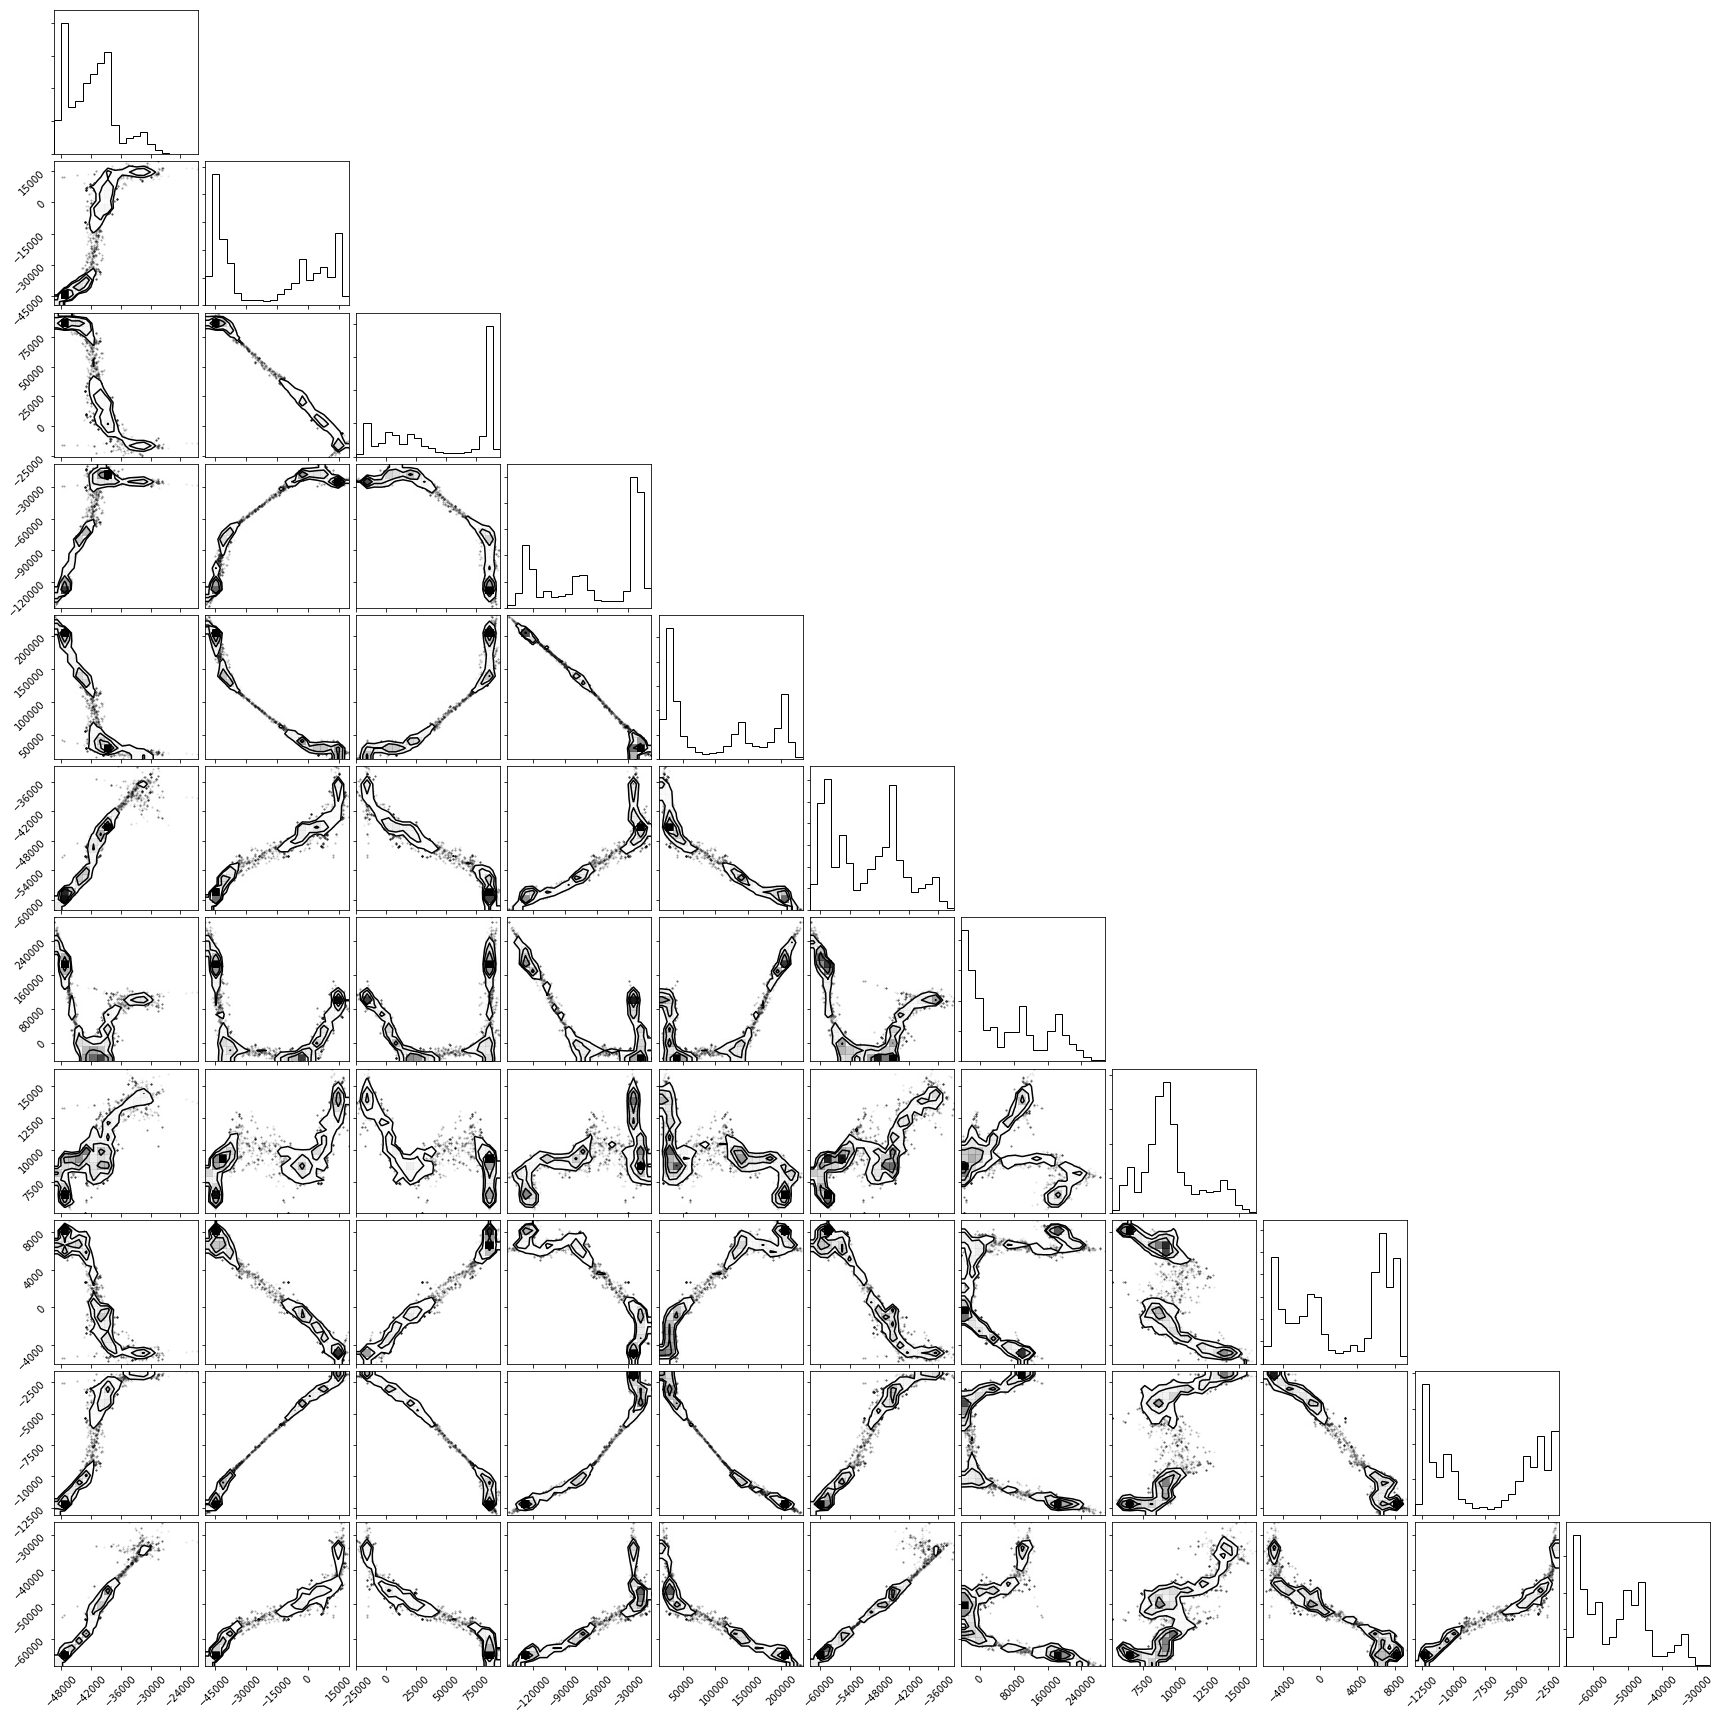

In [371]:
import corner
fig = corner.corner(chain)

(10000000.0, 10000000000.0)

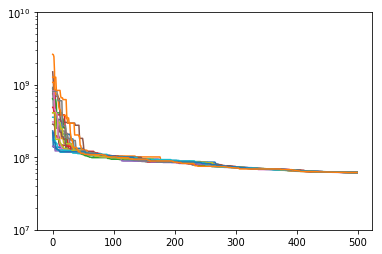

In [373]:
ax = plt.gca()
for i in range(22):
    ax.plot(-lnprob[nz].reshape((22, 500))[i,:])
ax.set_yscale('log')
ax.set_ylim(1e7, 1e10)

(60000000.0, 90000000.0)

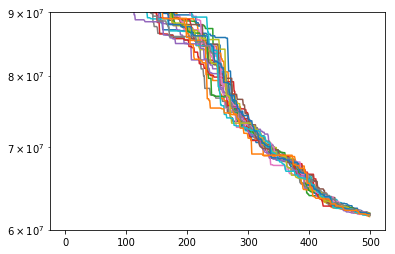

In [364]:
ax = plt.gca()
for i in range(22):
    ax.plot(-lnprob[nz].reshape((22, 500))[i,:])
ax.set_yscale('log')
ax.set_ylim(6e7, 9e7)